In [4]:
import xarray as xr

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate the time mean
time_mean_subset = subset_data.mean(dim='time')

# Save the time mean data as a new NetCDF file
time_mean_subset.to_netcdf('H:/#PM25_MODI/population_density/time_mean_pm25_concentration.nc')


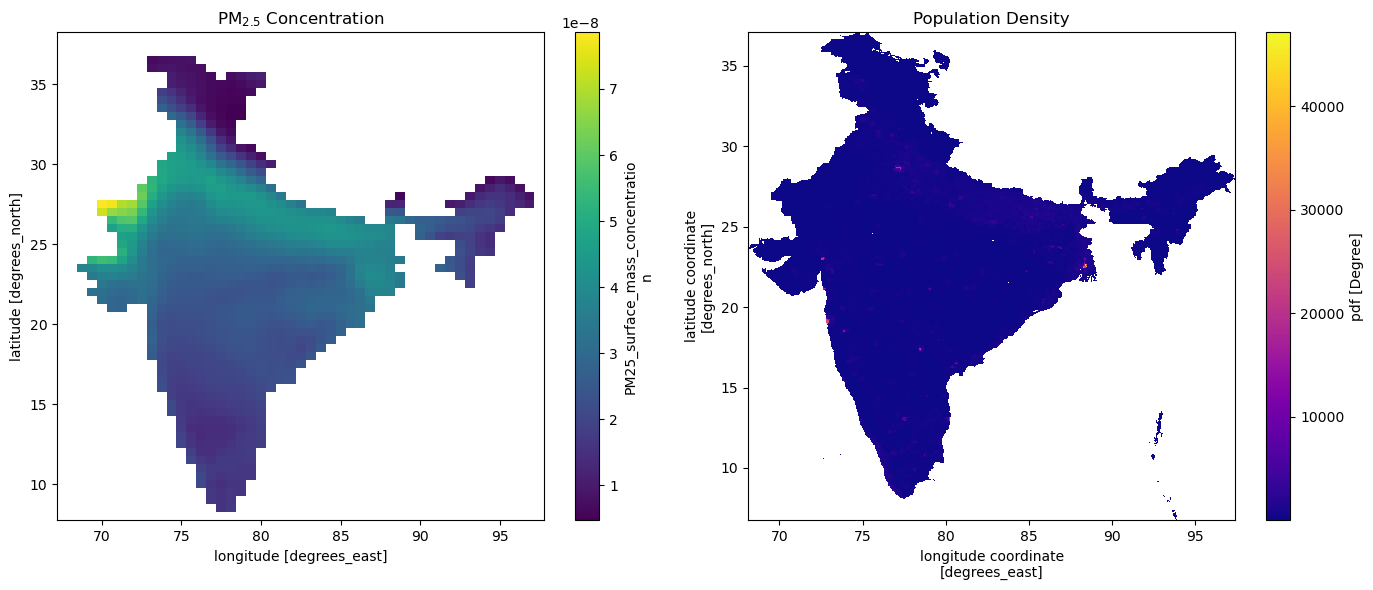

In [19]:
import xarray as xr
import matplotlib.pyplot as plt

# Load NetCDF files
nc_data_pm25 = xr.open_dataset('H:/#PM25_MODI/population_density/time_mean_pm25_concentration.nc')
nc_data_population = xr.open_dataset('H:/#PM25_MODI/population_density/polulation_density_01.nc')

# Plotting
plt.figure(figsize=(14, 6))

# Plot PM2.5 concentration
plt.subplot(1, 2, 1)
nc_data_pm25['PM25_surface_mass_concentration'].plot(cmap='viridis')
plt.title('PM$_{2.5}$ Concentration')

# Plot population density
plt.subplot(1, 2, 2)
nc_data_population['pdf'].plot(cmap='plasma')
plt.title('Population Density')

plt.tight_layout()
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

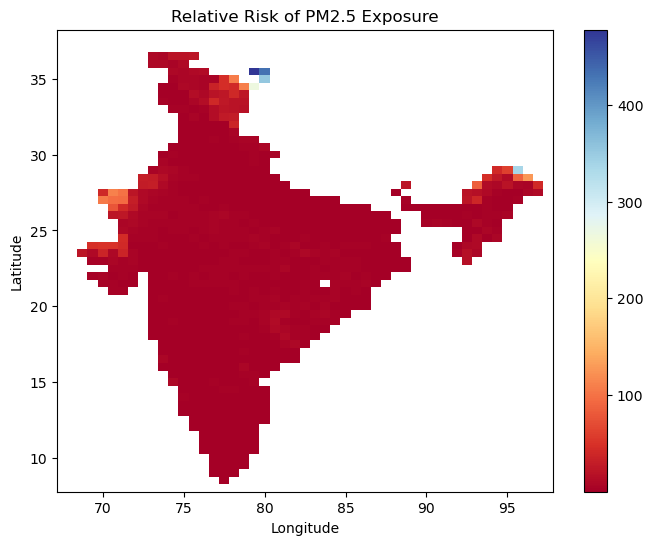

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load NetCDF files
nc_data_pm25 = xr.open_dataset('H:/#PM25_MODI/population_density/time_mean_pm25_concentration.nc')
nc_data_population = xr.open_dataset('H:/#PM25_MODI/population_density/polulation_density_01.nc')

# Interpolate population density to match PM2.5 grid
population_interp = nc_data_population.interp_like(nc_data_pm25)

# Calculate mean PM2.5 concentration and population density
mean_pm25 = nc_data_pm25['PM25_surface_mass_concentration'].mean()
mean_population = population_interp['pdf'].mean()

# Define function to calculate relative risk
def calculate_relative_risk(pm25, population):
    return (pm25 / mean_pm25) / (population / mean_population)

# Calculate relative risk
relative_risk = calculate_relative_risk(nc_data_pm25['PM25_surface_mass_concentration'], population_interp['pdf'])

# Plot relative risk
plt.figure(figsize=(8, 6))
relative_risk.plot(cmap='RdYlBu')
plt.title('Relative Risk of PM2.5 Exposure')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Relative Risk')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

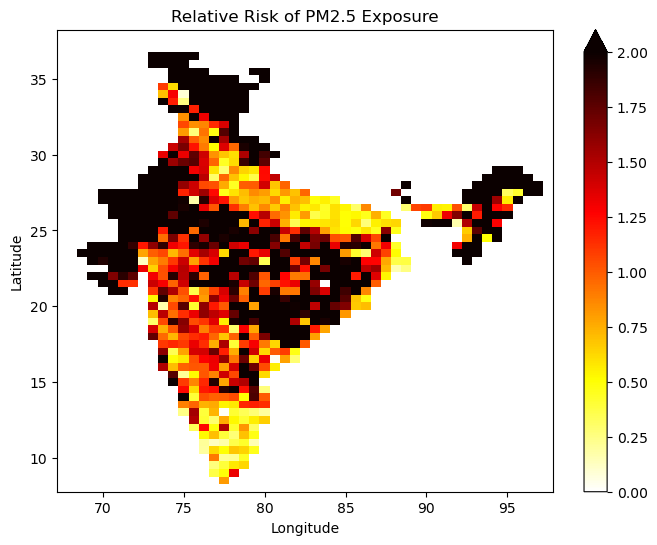

In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load NetCDF files
nc_data_pm25 = xr.open_dataset('H:/#PM25_MODI/population_density/time_mean_pm25_concentration.nc')
nc_data_population = xr.open_dataset('H:/#PM25_MODI/population_density/polulation_density_01.nc')

# Ensure correct variable access
pm25 = nc_data_pm25['PM25_surface_mass_concentration']
population_density = nc_data_population['pdf']

# Check data alignment and handle missing values
population_interp = population_density.interp_like(pm25)

# Calculate mean PM2.5 concentration and population density
mean_pm25 = pm25.mean()
mean_population = population_interp.mean()

# Define function to calculate relative risk
def calculate_relative_risk(pm25, population):
    return (pm25 / mean_pm25) / (population / mean_population)

# Calculate relative risk
relative_risk = calculate_relative_risk(pm25, population_interp)

# Plot relative risk
plt.figure(figsize=(8, 6))
# Setting vmin and vmax to emphasize specific ranges of relative risk
relative_risk.plot(cmap='hot_r', vmin=0, vmax=2.0)
plt.title('Relative Risk of PM2.5 Exposure')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Relative Risk')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

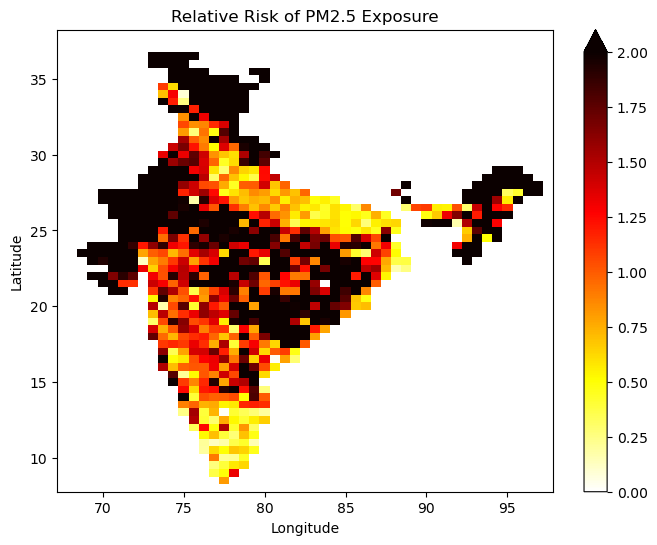

In [44]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load NetCDF files
nc_data_pm25 = xr.open_dataset('H:/#PM25_MODI/population_density/time_mean_pm25_concentration.nc')
nc_data_population = xr.open_dataset('H:/#PM25_MODI/population_density/polulation_density_01.nc')

# Ensure correct variable access
pm25 = nc_data_pm25['PM25_surface_mass_concentration']
population_density = nc_data_population['pdf']

# Interpolate population density data to match the grid of PM2.5 concentration data
population_interp = population_density.interp_like(pm25)

# Calculate mean PM2.5 concentration and population density
mean_pm25 = pm25.mean()
mean_population = population_interp.mean()

def calculate_relative_risk(pm25, population):
    exposed_probability = pm25 / population
    unexposed_probability = mean_pm25 / mean_population
    return exposed_probability / unexposed_probability



# Calculate relative risk
relative_risk = calculate_relative_risk(pm25, population_interp)

# Plot relative risk
plt.figure(figsize=(8, 6))
# Setting vmin and vmax to emphasize specific ranges of relative risk
relative_risk.plot(cmap='hot_r', vmin=0, vmax=2.0)
plt.title('Relative Risk of PM2.5 Exposure')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Relative Risk')
plt.show()



In [53]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load NetCDF files
nc_data_pm25 = xr.open_dataset('H:/#PM25_MODI/population_density/time_mean_pm25_concentration.nc')
nc_data_population = xr.open_dataset('H:/#PM25_MODI/population_density/polulation_density_01.nc')

# Extract variables
pm25 = nc_data_pm25['PM25_surface_mass_concentration']
population_density = nc_data_population['pdf']

# Interpolate population density to match PM2.5 concentration grid
population_interp = population_density.interp_like(pm25)

# Prepare data for neural network
X = population_interp.values.flatten().reshape(-1, 1)  # Features (population density)
y = pm25.values.flatten()  # Target variable (PM2.5 exposure)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer (PM2.5 exposure prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
19/19 [==============================] - 0s 867us/step - loss: nan
Test Loss: nan


19/19 [==============================] - 0s 1ms/step


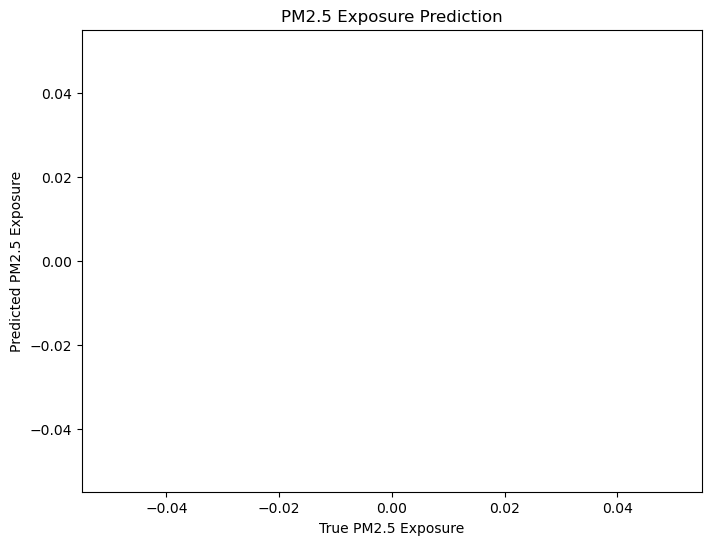

In [54]:
# Predict PM2.5 exposure levels
y_pred = model.predict(X_test).flatten()

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True PM2.5 Exposure')
plt.ylabel('Predicted PM2.5 Exposure')
plt.title('PM2.5 Exposure Prediction')
plt.show()
